In [7]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
sns.set_context("talk")

import pynetlogo

netlogo = pynetlogo.NetLogoLink(gui=True, jvm_path='/Library/Java/JavaVirtualMachines/jdk-22.jdk/Contents/MacOS/libjli.dylib', netlogo_home='/Users/takacstamas/NetLogo')
netlogo.load_model('/Users/takacstamas/NetLogo/models/Sample Models/Biology/Wolf Sheep Predation.nlogo')

netlogo.command("setup")

In [10]:
agent_xy = pd.read_excel("xy_DataFrame.xlsx")
agent_xy[["who", "xcor", "ycor"]].head(5)

,who,xcor,ycor
0,0,-24.000000,-24.000000
1,1,-23.666667,-23.666667
2,2,-23.333333,-23.333333
3,3,-23.000000,-23.000000
4,4,-22.666667,-22.666667


In [11]:
netlogo.write_NetLogo_attriblist(agent_xy[["who", "xcor", "ycor"]], "a-sheep")

In [12]:
x = netlogo.report("map [s -> [xcor] of s] sort sheep")
y = netlogo.report("map [s -> [ycor] of s] sort sheep")

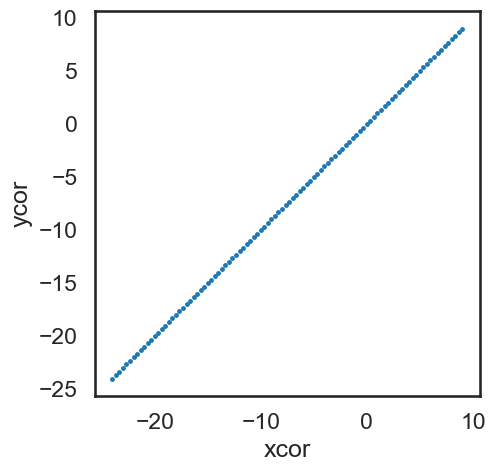

In [13]:
fig, ax = plt.subplots(1)

ax.scatter(x, y, s=4)
ax.set_xlabel("xcor")
ax.set_ylabel("ycor")
ax.set_aspect("equal")
fig.set_size_inches(5, 5)

plt.show()

In [14]:
# We can use either of the following commands to run for 100 ticks:

netlogo.command("repeat 100 [go]")
# netlogo.repeat_command('go', 100)


# Return sorted arrays so that the x, y and energy properties of each agent are in the same order
x = netlogo.report("map [s -> [xcor] of s] sort sheep")
y = netlogo.report("map [s -> [ycor] of s] sort sheep")
energy_sheep = netlogo.report("map [s -> [energy] of s] sort sheep")

energy_wolves = netlogo.report("[energy] of wolves")

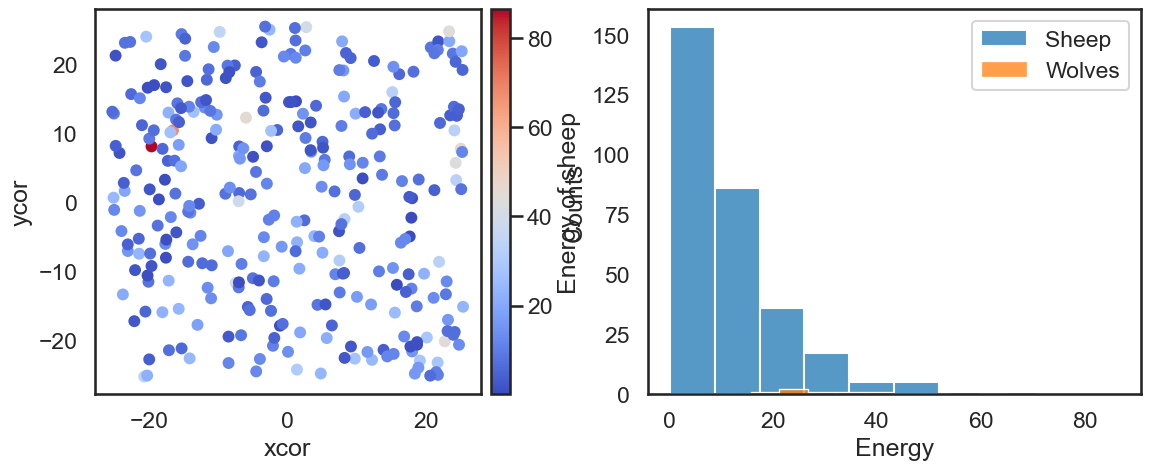

In [15]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 2)

sc = ax[0].scatter(x, y, s=50, c=energy_sheep, cmap=plt.cm.coolwarm)
ax[0].set_xlabel("xcor")
ax[0].set_ylabel("ycor")
ax[0].set_aspect("equal")
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(sc, cax=cax, orientation="vertical")
cbar.set_label("Energy of sheep")

sns.histplot(energy_sheep, kde=False, bins=10, ax=ax[1], label="Sheep")
sns.histplot(energy_wolves, kde=False, bins=10, ax=ax[1], label="Wolves")
ax[1].set_xlabel("Energy")
ax[1].set_ylabel("Counts")
ax[1].legend()
fig.set_size_inches(14, 5)

plt.show()

In [16]:
counts = netlogo.repeat_report(["count wolves", "count sheep"], 200, go="go")

In [17]:
counts = pd.DataFrame(counts)

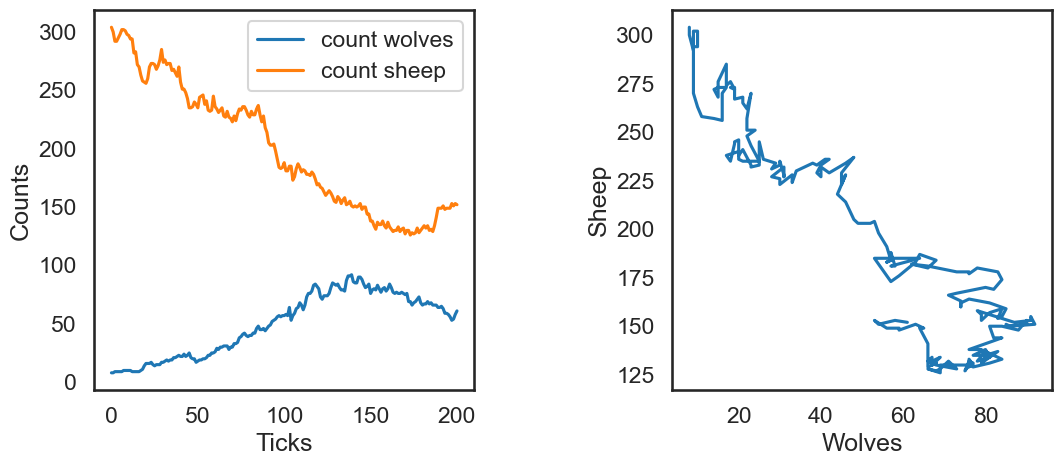

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2)

counts.plot(ax=ax1, use_index=True, legend=True)
ax1.set_xlabel("Ticks")
ax1.set_ylabel("Counts")

ax2.plot(counts["count wolves"], counts["count sheep"])
ax2.set_xlabel("Wolves")
ax2.set_ylabel("Sheep")


for ax in [ax1, ax2]:
    ax.set_aspect(1 / ax.get_data_ratio())


fig.set_size_inches(12, 5)
plt.tight_layout()
plt.show()

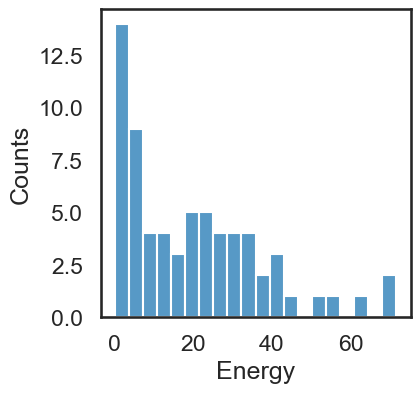

In [22]:
results = netlogo.repeat_report(
    [
        "[energy] of wolves",
        "[energy] of sheep",
        "count sheep",
    ],
    5,
)

fig, ax = plt.subplots(1)

sns.histplot(results["[energy] of wolves"][-1], kde=False, bins=20, ax=ax)
ax.set_xlabel("Energy")
ax.set_ylabel("Counts")
fig.set_size_inches(4, 4)

plt.show()

In [23]:
list(results.keys())

['[energy] of wolves', '[energy] of sheep', 'count sheep']

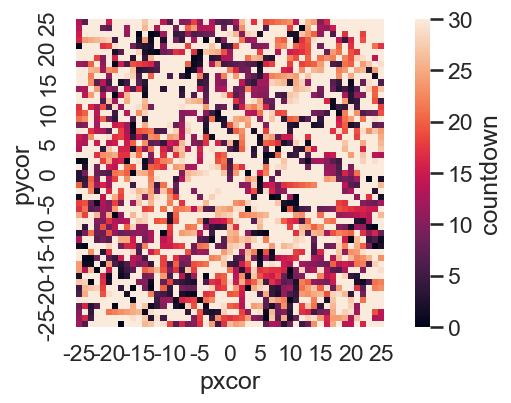

In [24]:
countdown_df = netlogo.patch_report("countdown")

fig, ax = plt.subplots(1)

patches = sns.heatmap(
    countdown_df, xticklabels=5, yticklabels=5, cbar_kws={"label": "countdown"}, ax=ax
)
ax.set_xlabel("pxcor")
ax.set_ylabel("pycor")
ax.set_aspect("equal")
fig.set_size_inches(8, 4)

plt.show()

In [25]:
countdown_df.to_excel("countdown.xlsx")
netlogo.patch_set("countdown", countdown_df.max() - countdown_df)

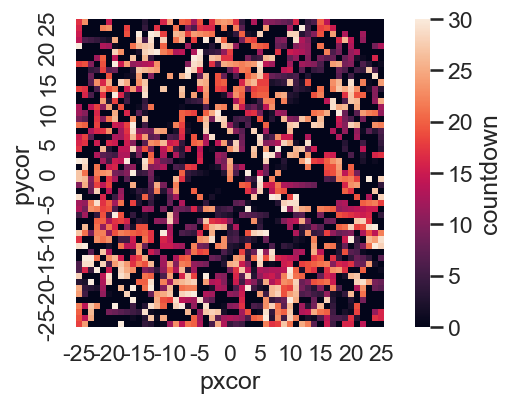

In [26]:
countdown_update_df = netlogo.patch_report("countdown")

fig, ax = plt.subplots(1)

patches = sns.heatmap(
    countdown_update_df,
    xticklabels=5,
    yticklabels=5,
    cbar_kws={"label": "countdown"},
    ax=ax,
)
ax.set_xlabel("pxcor")
ax.set_ylabel("pycor")
ax.set_aspect("equal")
fig.set_size_inches(8, 4)

plt.show()

In [ ]:
netlogo.kill_workspace()